## Mongo Connection

Mongo connection string consists of ip and port of the server on which your mongo is running.

My mongo is running on a docker container on server ->
   * **ip:   192.168.18.4** 
   * **port:  27017**

and model requests is the name of my collection inside a db

In [46]:
from pymongo import MongoClient


connectionString = "mongodb://192.168.18.4:27017/model_requests";
client = MongoClient(connectionString)

I inserted some testing values in db from docker container for test purpose so that I know that mongo is connected properly with my machine or not. 

Cell below will list all the entries inside the mongo db which I inserted

In [47]:

db = client.model_requests #test is my database
col = db.req #Here spam is my collection
array = list(col.find())
print(array)

[{'_id': ObjectId('60c4ef75dd0bb78ad0828b89'), 'request': 12343.0, 'Image': 'asdfeewfdsdfe'}, {'_id': ObjectId('60c4f456dd0bb78ad0828b8a'), 'request': 12342.0, 'Image': 'ok connected'}, {'_id': ObjectId('60c4fd56c2ad788fb3e92694'), 'request_id': 76918, 'base64': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0

# Adding a base64 image to our mongo database

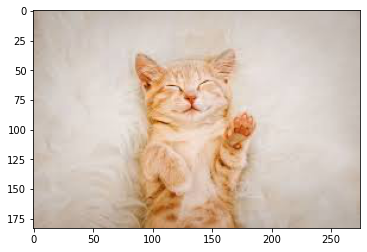

Image ID : 98875


In [48]:
from pymongo import MongoClient
from PIL import Image
import io, random
import matplotlib.pyplot as plt

# Reading Image
im          = Image.open("docs/cat.jpeg")

# Converting Image to baes64
image_bytes = io.BytesIO()
im.save(image_bytes, format='JPEG')

# Generating a random ID from which we can store our new Request
random_id   = int(random.random()*100000)

# Showing Image
plt.imshow(im)
plt.show()

image = {
    'request_id': random_id,
    'base64': image_bytes.getvalue()
}

image_id = col.insert_one(image).inserted_id

print(f"Image ID : {random_id}")

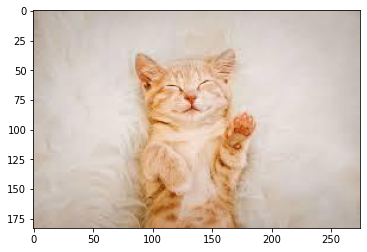

In [49]:
#Querying the saved Image back Just for testing
query_results = list(col.find({"request_id": random_id}))
base64_image  = query_results[0]['base64']

# Converting the base64 image back to Pil object.
pil_img = Image.open(io.BytesIO(base64_image))

# Displaying Image
plt.imshow(pil_img)
plt.show()

